In [52]:
import os
import sys
import pandas as pd
import networkx as nx
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

A continuación se carga la base de datos tomada para la realización del ejercicio, la cual fue condensanda en un archivo '.edge', convertido mediante el software sublime a un archive de texto que pudiera ser fácilmente manejado.

Name: 
Type: Graph
Number of nodes: 65
Number of edges: 730
Average degree:  22.4615


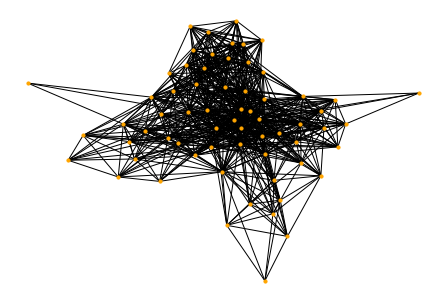

In [53]:
G_cat=nx.read_edgelist('bn-cat-mixed-species_brain_1.txt', create_using=nx.Graph(), nodetype=int)
print(nx.info(data_cat))
nx.draw(G_cat,font_size=0.5,node_size=10,node_color='orange')

In [60]:
from pyvis.network import Network as nt
Gc_vis=nt(height="750px", width="100%", bgcolor="#E9DEDE", font_color="white", notebook=True)
Gc_vis.barnes_hut()
Gc_vis.from_nx(G_cat)
Gc_vis.toggle_physics(True)
Gc_vis.show_buttons(filter_=['physics'])
Gc_vis.show("cerebro_gato.html")

## Calculo de medidas
### Grado promedio
El grado promedio del grafo no dirigidos se puede calcular como:

$$ \bar{d}=\dfrac{\sum_{i=1}^g d(n_i)}{g}=\frac{2L}{g} $$

Donde $d(n_i)$ es el numero de vinvulos que tiene el nodo $i$, $g$ es el numero total de nodos de la red, y $L$ el numero tatal de aristas. NetworkX nos pemite hallar este valor usando la función nx.number_of_nodes(G_cat) que devuelve la cantidad total de nodos del grafo, nótese que de igual forma, la función nx.info(G_cat) muestra insformación general relacionada con el grafo. Para encontrar el numero total de aristas su puede usar la función nx.number_of_edges(G_cat) de Networkx:

In [55]:
g=nx.number_of_nodes(G_cat)
L=nx.number_of_edges(G_cat)
d_bar=2*L/g
print('g=',g)
print('L=',L)
print('Grado promedio:',d_bar)

g= 65
L= 730
Grado promedio: 22.46153846153846


El resultado anterior esta en concordancia con lo el valor calculado por la función nx.info(...), con lo que se confirma el grado promedio de nuestro grafo. Si además calculamos este mismo grado promedio por medio de su definición:

In [56]:
knot=G_cat.nodes
d=nx.degree(G_cat)
def grad_prom(knot):
    accu=0
    for i in knot:
        accu=d[i]+accu 
    d_bar_i=accu
    return d_bar_i/g 

print('Grado promedio:', grad_prom(knot))

Grado promedio: 22.46153846153846


Comprobamos la validez del resultado obtenido en Wasserman y de paso la efectividad de los algoritmos de NetworkX.

## Varianza de los nodos

Corresponde al segundo momento sobre la media, o lo que es lo mismo, la desviación estándar de las medidas de nuestro grafo, es una médida que muestra la variabilidad de la acción de los nodos en neustra red, en este caso de las neuronas del bulbo olfatorio del dato al rededor del centro de esta estrucura neuronal, esta medida no ofrece suficiente información si nuestra red es libre de escala, debido a que las conexiones en nuestra red no se ajustan a un distribución potencial. Matemáticamente está expresada de la forma:

$$ S^{2}_D=\dfrac{\sum_{i=1}^g\left(d(n_i)-\bar{d}\right)^2}{g} $$

In [61]:
def var(knot):
    accu=0
    for i in knot:
        accu=(d[i]-d_bar)**2+accu
    var_i=accu
    return var_i/g

print('Desviación estándar:', var(knot))

Desviación estándar: 98.21775147928993
